In [5]:
import pandas as pd
#data from https://www.swiss-composite.ch/pdf/i-Werkstoffdaten.pdf
# Erstellen des ersten DataFrames
daten1 = {
    "Werkstoff": ["Polyesterharze", "Epoxydharze", "Vinylesterharze"],
    "Dichte [g/cm3]": ["1.12 - 1.25", "1.1 - 1.25", "1.07"],
    "Bruchdehnung [%]": ["< 3", "6 - 8", "3.5 - 7"]
}

df1 = pd.DataFrame(daten1)

# Erstellen des zweiten DataFrames
daten2 = {
    "Werkstoff": ["Polyesterharze", "Epoxydharze", "Vinylesterharze"],
    "Zugfestigkeit [MPa]": ["50 - 70", "70 - 90", "75 - 85"],
    "Zugmodul [GPa]": ["3.5 - 4,7", "2.8 - 3.6", "3.4 - 3.5"],
    "Biegefestigkeit [MPa]": ["60 - 120", "140 -160", "125 -135"],
    "Biegemodul [GPa]": ["4.0 - 5.0", "4.5 - 6.0", "3.2 - 3.8"]
}

df2 = pd.DataFrame(daten2)

# Zusammenführen der beiden DataFrames
df_gesamt = pd.merge(df1, df2, on="Werkstoff")

# Speichern des DataFrames als CSV-Datei
dateipfad = "resin_properties.csv"
df_gesamt.to_csv(dateipfad, index=False)

dateipfad



'resin_properties.csv'

In [8]:
import pandas as pd

# Daten aus https://www.swiss-composite.ch/pdf/i-Werkstoffdaten.pdf
# Erstellen des ersten DataFrames
daten1 = {
    "Werkstoff": ["Polyesterharze", "Epoxydharze", "Vinylesterharze"],
    "Dichte [g/cm3]": ["1.12 - 1.25", "1.1 - 1.25", "1.07 - 1.07"],
    "Bruchdehnung [%]": ["1 - 3", "6 - 8", "3.5 - 7"]
}

df1 = pd.DataFrame(daten1)

# Erstellen des zweiten DataFrames
daten2 = {
    "Werkstoff": ["Polyesterharze", "Epoxydharze", "Vinylesterharze"],
    "Zugfestigkeit [MPa]": ["50 - 70", "70 - 90", "75 - 85"],
    "Zugmodul [GPa]": ["3.5 - 4.7", "2.8 - 3.6", "3.4 - 3.5"],
    "Biegefestigkeit [MPa]": ["60 - 120", "140 - 160", "125 - 135"],
    "Biegemodul [GPa]": ["4.0 - 5.0", "4.5 - 6.0", "3.2 - 3.8"]
}

df2 = pd.DataFrame(daten2)

# Zusammenführen der beiden DataFrames
df_gesamt = pd.merge(df1, df2, on="Werkstoff")

# Aufspaltung der von-bis Werte in separate Spalten
spalten_zum_aufteilen = [spalte for spalte in df_gesamt.columns if "-" in str(df_gesamt[spalte][0])]

for spalte in spalten_zum_aufteilen:
    df_gesamt[[f"{spalte} von", f"{spalte} bis"]] = df_gesamt[spalte].str.split(' - ', expand=True)

# Entfernen der originalen von-bis Spalten
df_gesamt = df_gesamt.drop(columns=spalten_zum_aufteilen)

# Speichern des DataFrames als CSV-Datei
dateipfad = "resin_properties.csv"
df_gesamt.to_csv(dateipfad, index=False)

df_gesamt, dateipfad


(         Werkstoff Dichte [g/cm3] von Dichte [g/cm3] bis Bruchdehnung [%] von  \
 0   Polyesterharze               1.12               1.25                    1   
 1      Epoxydharze                1.1               1.25                    6   
 2  Vinylesterharze               1.07               1.07                  3.5   
 
   Bruchdehnung [%] bis Zugfestigkeit [MPa] von Zugfestigkeit [MPa] bis  \
 0                    3                      50                      70   
 1                    8                      70                      90   
 2                    7                      75                      85   
 
   Zugmodul [GPa] von Zugmodul [GPa] bis Biegefestigkeit [MPa] von  \
 0                3.5                4.7                        60   
 1                2.8                3.6                       140   
 2                3.4                3.5                       125   
 
   Biegefestigkeit [MPa] bis Biegemodul [GPa] von Biegemodul [GPa] bis  
 0           

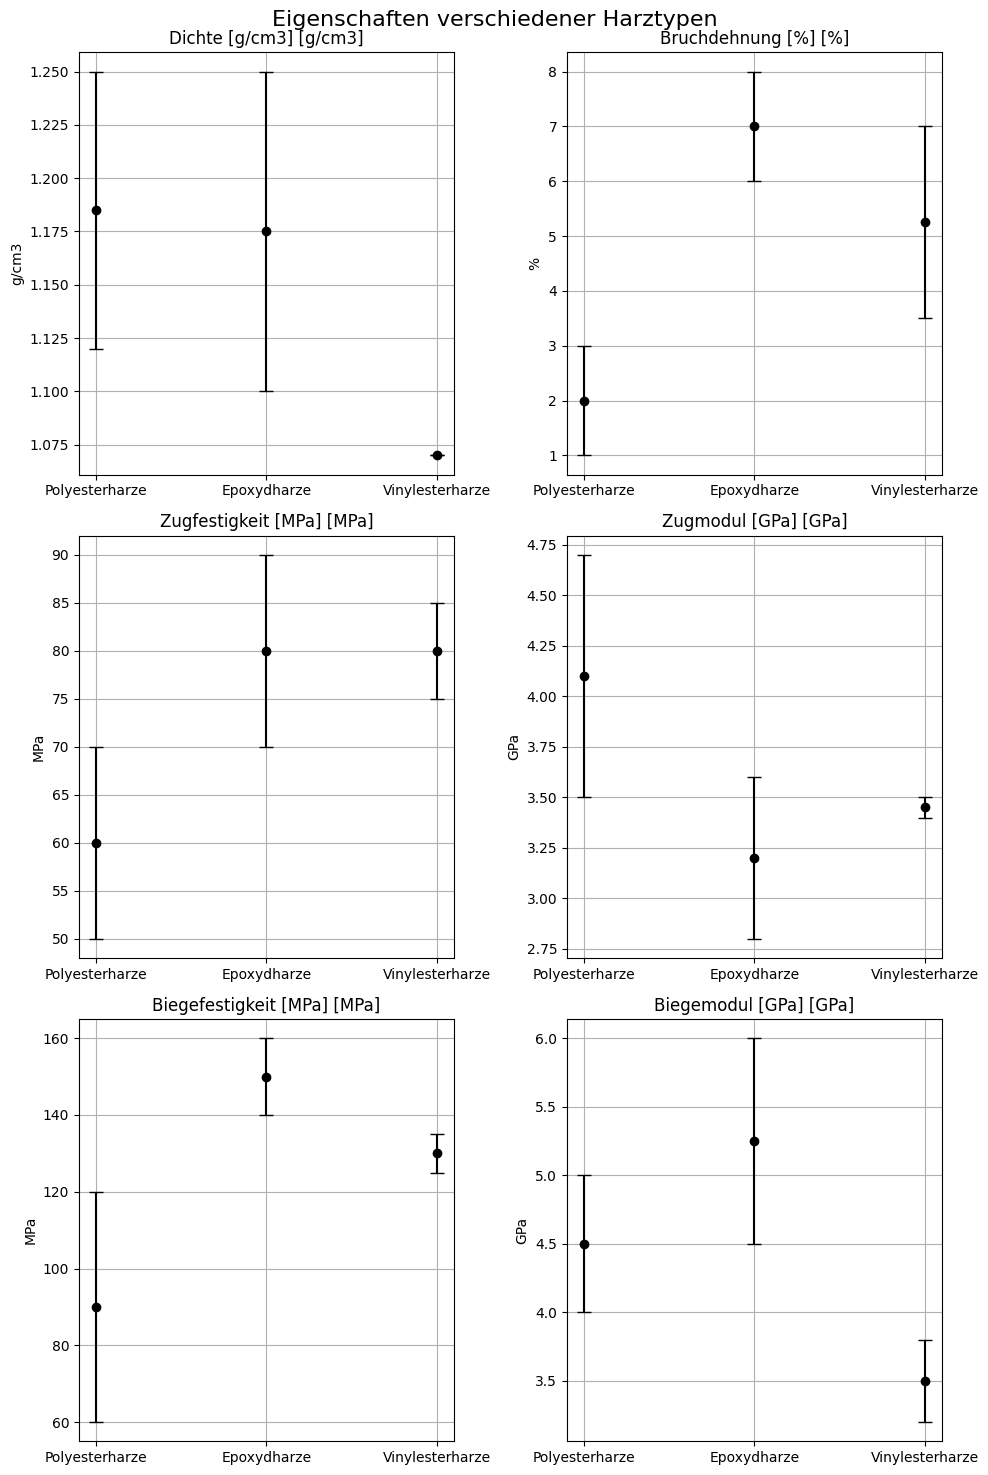

In [18]:

import matplotlib.pyplot as plt
import pandas as pd

# Load DataFrame
df = pd.read_csv("resin_properties.csv")  

# Function to create error bar plots
def create_errorbar_plot(ax, df, column_name, unit):
    # Prepare data
    materials = df['Werkstoff']
    values_from = df[column_name + ' von'].astype(float)
    values_to = df[column_name + ' bis'].astype(float)

    # Calculate mean values and error ranges
    mean_values = (values_from + values_to) / 2
    errors = (values_to - values_from) / 2

    # Create error bar plot
    ax.errorbar(materials, mean_values, yerr=errors, fmt='o', color='black', ecolor='black', capsize=5)
    ax.set_title(column_name + ' [' + unit + ']')
    ax.set_ylabel(unit)
    ax.grid(True)

# Determine number of columns to plot
num_columns = sum('von' in col for col in df.columns)

# Calculate number of rows and columns for the subplots
num_rows = (num_columns + 1) // 2
fig, axs = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))

# Flatten the axis matrix if more than one row
if num_rows > 1:
    axs = axs.flatten()
else:
    axs = [axs]

# Create plots for each column
plot_index = 0
for col in df.columns:
    if "von" in col:
        column_name = col.split(" von")[0]
        unit = column_name.split("[")[-1].split("]")[0]
        create_errorbar_plot(axs[plot_index], df, column_name, unit)
        plot_index += 1

# Turn off unused subplots
for i in range(plot_index, len(axs)):
    axs[i].axis('off')

# Add a title for the entire plot
fig.suptitle('Eigenschaften verschiedener Harztypen', fontsize=16)

plt.tight_layout()
plt.savefig('Harze_Festigkeitswerte.png')

plt.show()
